# Demystifying: Machine Learning

Carlos Natalino $^1$ and Ben Mills $^2$

$^1$ Department of Electrical Engineering, Chalmers University of Technology, Gothenburg, Sweden. https://www.chalmers.se/en/persons/carda/

$^2$ University of Southampton, Southampton, UK. https://www.southampton.ac.uk/people/5x7lvp/doctor-ben-mills

## Part 1.1: Introduction to Machine Learning

This notebook has the following goals:

1. Import relevant libraries and files
2. Illustrate initial steps for data analysis
3. Illustrate general steps for data exploration and preparation

General links can be found here: https://github.com/carlosnatalino/demystifying-ml/

### Goal 1: Import relevant libraries and files

In [30]:
# Here we concentrate all the imports
import glob
import os
import sys

import pandas as pd
import requests
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
sys.version

'3.12.4 (main, Jun  6 2024, 18:26:44) [Clang 15.0.0 (clang-1500.3.9.4)]'

In [2]:
import matplotlib
matplotlib.__version__

'3.9.1'

In [3]:
pd.__version__

'2.2.2'

In [4]:
requests.__version__

'2.32.3'

In [5]:
import sklearn
sklearn.__version__

'1.5.1'

In [9]:
service_id = 1002

In [13]:
# Here we list the files that are within the folder.
os.makedirs("./downloads", exist_ok=True)
if not os.path.exists("./downloads/nobel-eu_200_initial_dataset.csv"):
    with open("./downloads/nobel-eu_200_initial_dataset.csv", "wt", encoding="utf-8") as file:
        content = requests.get("https://github.com/carlosnatalino/demystifying-ml/raw/main/datasets/nobel-eu_200_initial_dataset.csv")
        file.write(content.text)
if not os.path.exists(f"./downloads/service_{service_id}_data.csv"):
    with open(f"./downloads/service_{service_id}_data.csv", "wt", encoding="utf-8") as file:
        content = requests.get(f"https://github.com/carlosnatalino/demystifying-ml/raw/main/datasets/service_{service_id}_data.csv")
        file.write(content.text)
os.listdir("./downloads")

['service_1002_data.csv', 'nobel-eu_200_initial_dataset.csv']

### Goal 2: Steps for data analysis

#### Data for QoT estimation

In [14]:
data_qot = pd.read_csv("./downloads/nobel-eu_200_initial_dataset.csv", index_col=0)
data_qot.describe()

,source_id,source_degree,destination_id,destination_degree,path_length,mean_link_length,min_link_length,max_link_length,std_link_length,number_hops,...,modulation_order,bit_rate,GSNR,ASE,NLI,margin,mean_link_usage,min_link_usage,max_link_usage,std_link_usage
count,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,...,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000,95518.000000
mean,13.528424,2.954857,13.620490,2.947947,1583.990281,457.281210,306.756397,625.310945,126.410997,3.509443,...,4.222063,125.598526,17.384867,18.800307,28.050723,3.521216,0.743527,0.633601,0.842637,0.082332
std,8.085343,0.845148,8.081808,0.840862,802.241614,126.706851,143.627008,204.460355,86.644056,1.627602,...,1.168566,147.776125,4.359600,5.086228,6.991483,1.431692,0.093699,0.141762,0.092153,0.053663
min,0.000000,2.000000,0.000000,2.000000,157.685000,157.685000,157.685000,157.685000,0.000000,1.000000,...,1.000000,10.000000,3.983312,3.983744,15.941123,0.264055,0.287500,0.256250,0.287500,0.000000
25%,6.000000,2.000000,7.000000,2.000000,945.095000,384.432333,215.887000,519.156000,74.305500,2.000000,...,4.000000,10.000000,15.661842,16.433287,22.675202,2.644396,0.681250,0.525000,0.790625,0.040172
50%,14.000000,3.000000,14.000000,3.000000,1500.154000,438.630500,271.182000,584.226000,126.302903,3.000000,...,4.000000,40.000000,17.859917,19.630077,26.150153,3.480484,0.740625,0.623437,0.856250,0.082812
75%,20.000000,3.000000,21.000000,3.000000,2086.724000,520.891800,350.553000,708.738000,164.618600,5.000000,...,5.000000,100.000000,20.135566,22.182579,31.218869,4.450121,0.806250,0.737500,0.909375,0.121941
max,27.000000,5.000000,27.000000,5.000000,4227.992000,1306.436000,1306.436000,1306.436000,454.922422,8.000000,...,6.000000,400.000000,29.893781,32.101415,44.805517,10.880316,0.996875,0.996875,0.996875,0.303125


In [15]:
data_qot.head()

,source_id,source_degree,destination_id,destination_degree,path_length,mean_link_length,min_link_length,max_link_length,std_link_length,number_hops,...,modulation_order,bit_rate,GSNR,ASE,NLI,margin,mean_link_usage,min_link_usage,max_link_usage,std_link_usage
index,,,,,,,,,,,,,,,,,,,,,
0,8.0,2.0,25.0,3.0,1171.628,585.814000,350.553,821.075,235.261000,2.0,...,5.0,40.0,22.236468,22.936786,30.506813,6.075570,0.996875,0.996875,0.996875,0.000000e+00
1,22.0,2.0,13.0,3.0,3130.231,626.046200,373.939,821.075,167.833940,5.0,...,4.0,10.0,17.483068,18.203988,25.637517,4.242421,0.996250,0.993750,0.996875,1.250000e-03
2,2.0,2.0,6.0,3.0,1278.638,426.212667,312.787,539.434,92.528363,3.0,...,4.0,100.0,18.952927,19.228459,31.066096,5.712280,0.993750,0.993750,0.993750,0.000000e+00
3,4.0,5.0,3.0,3.0,1202.821,400.940333,271.182,606.079,146.743872,3.0,...,5.0,10.0,22.334390,23.096847,30.265729,6.173491,0.996875,0.996875,0.996875,1.110223e-16
4,6.0,3.0,7.0,3.0,2067.204,413.440800,192.763,623.241,174.139168,5.0,...,4.0,10.0,19.318349,20.308761,26.223834,6.077702,0.994375,0.993750,0.996875,1.250000e-03


In [16]:
data_qot.columns

Index(['source_id', 'source_degree', 'destination_id', 'destination_degree',
       'path_length', 'mean_link_length', 'min_link_length', 'max_link_length',
       'std_link_length', 'number_hops', 'number_spans', 'center_frequency',
       'modulation_order', 'bit_rate', 'GSNR', 'ASE', 'NLI', 'margin',
       'mean_link_usage', 'min_link_usage', 'max_link_usage',
       'std_link_usage'],
      dtype='object')

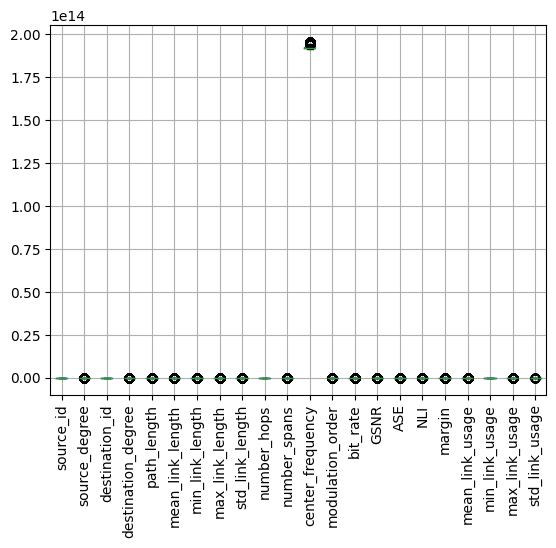

In [17]:
plt.figure()
data_qot.boxplot()
_ = plt.xticks(rotation=90)

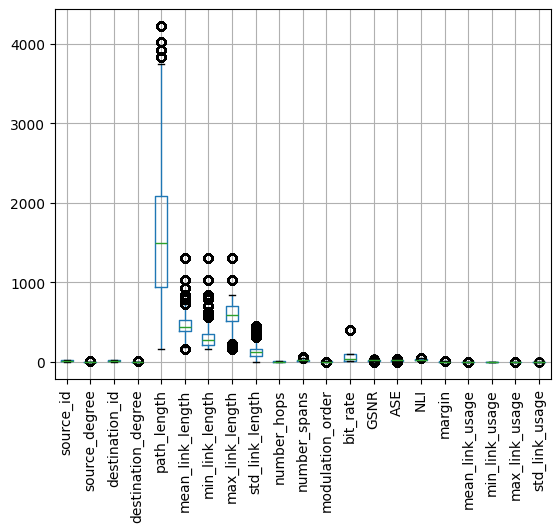

In [18]:
plt.figure()
data_qot.drop(["center_frequency"], axis=1).boxplot()
_ = plt.xticks(rotation=90)

#### Data for anomaly detection

In [20]:
# Listing data files.
glob.glob("./downloads/service_*_data.csv")

['./downloads/service_1002_data.csv']

In [21]:
# Pick one of the service IDs shown above.
data_ad = pd.read_csv(f"./downloads/service_{service_id}_data.csv")
data_ad.describe()

,GSNR,ASE,NLI,status
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,12.424359,12.495753,30.433592,0.500000
std,0.649325,0.665375,0.519377,0.500013
min,11.205421,11.244507,29.683639,0.000000
25%,11.815239,11.871565,30.014746,0.000000
50%,12.539121,12.614530,30.354382,0.500000
75%,13.031819,13.116411,30.683544,1.000000
max,13.404702,13.508048,31.683605,1.000000


<Figure size 640x480 with 0 Axes>

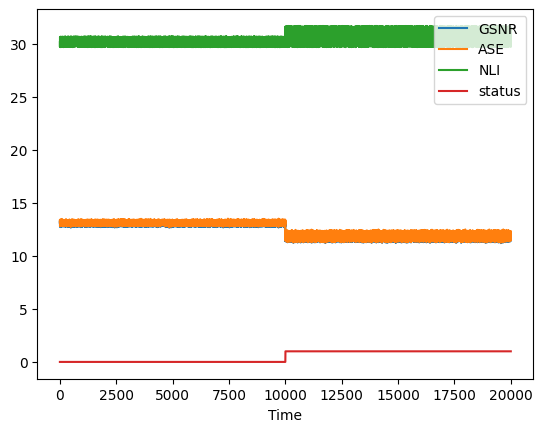

In [22]:
plt.figure()
data_ad.plot()
_ = plt.xlabel("Time")

### Goal 3: Steps for data exploration and preparation

#### Data normalization

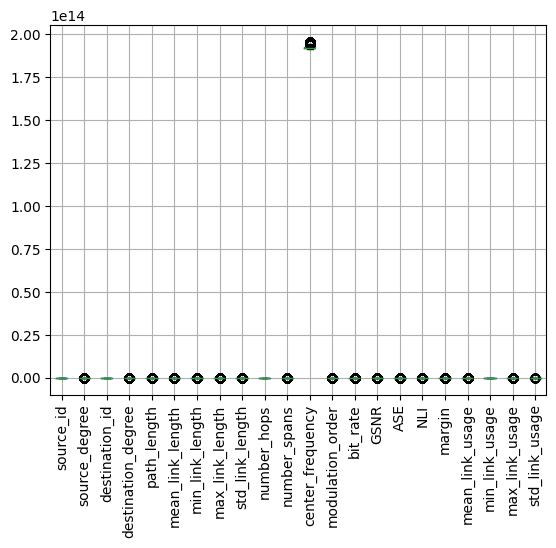

In [23]:
# Let us first visualize again the data without normalization.
plt.figure()
data_qot.boxplot()
_ = plt.xticks(rotation=90)

Now, let us standardize the value $v$ of each feature by removing the mean $\mu$ and scaling to the unit of standard deviation $\sigma$:

$
v_{new} = \frac{v - \mu}{\sigma}
$

In [24]:
scaler_qot = preprocessing.StandardScaler().fit(data_qot)
scaled_qot = scaler_qot.transform(data_qot)
scaled_qot_df = pd.DataFrame(scaled_qot, columns=data_qot.columns)

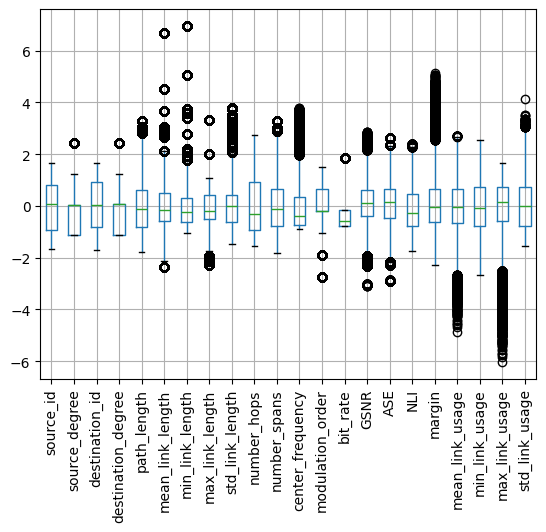

In [25]:
# Let us now visualize the data after normalization
plt.figure()
scaled_qot_df.boxplot()
_ = plt.xticks(rotation=90)

In [26]:
scaler_ad = preprocessing.StandardScaler().fit(data_ad)
scaled_ad = scaler_ad.transform(data_ad)
scaled_ad_df = pd.DataFrame(scaled_ad, columns=data_ad.columns)

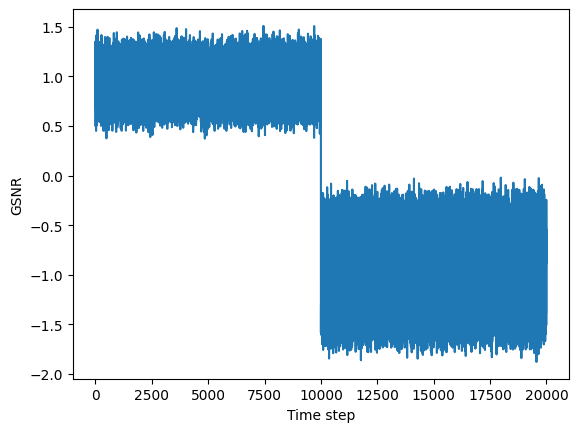

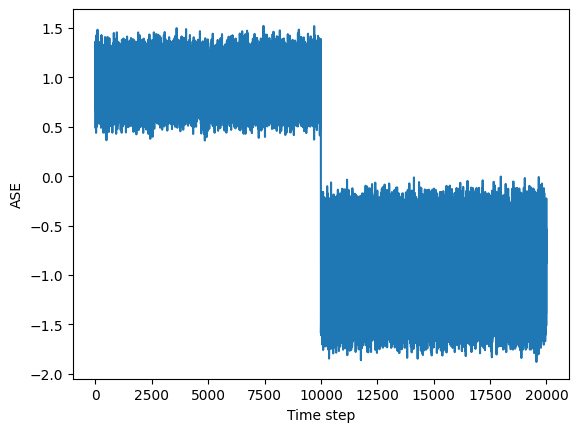

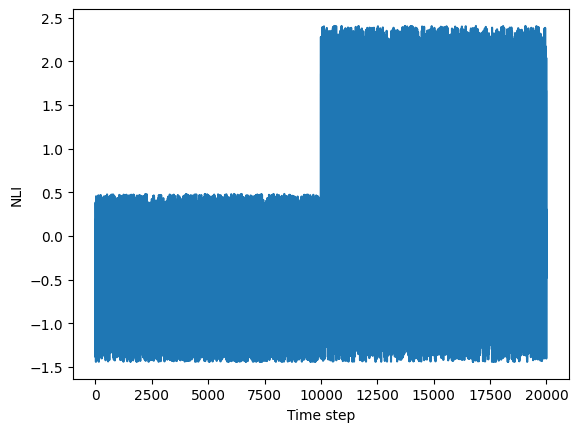

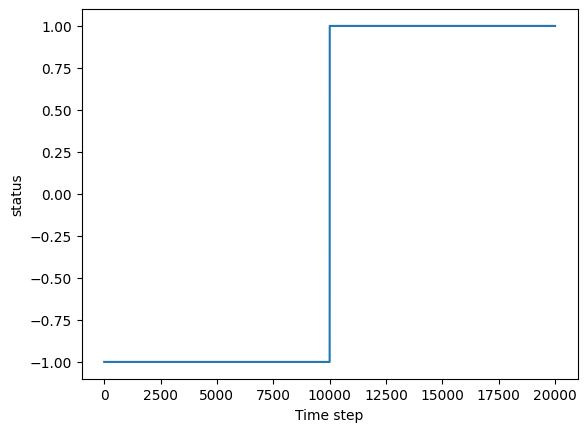

In [27]:
# Let us now visualize the data after normalization
for column in scaled_ad_df.columns:
  plt.figure()
  scaled_ad_df[column].plot()
  plt.xlabel("Time step")
  plt.ylabel(column)

#### Data visualization

Let us visualize the GSNR vs. path length

Text(0, 0.5, 'GSNR [dB]')

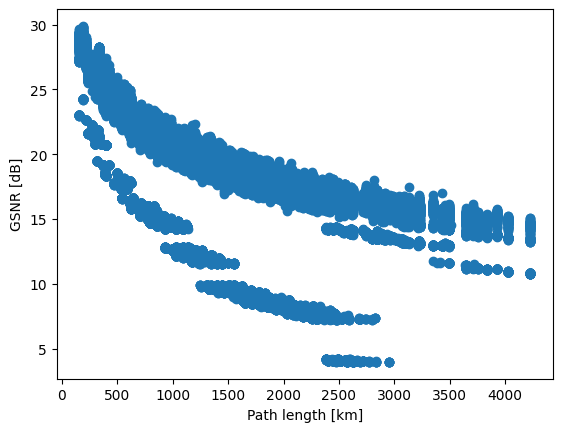

In [29]:
plt.figure()
plt.scatter(data_qot["path_length"], data_qot["GSNR"])
plt.xlabel("Path length [km]")
plt.ylabel("GSNR [dB]")